# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [3]:
data = pd.read_csv('US_Baby_Names_right.txt')
baby_names = pd.DataFrame(data)
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [4]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [5]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [6]:
baby_names.drop(['Unnamed: 0' , 'Id'], axis=1)
baby_names.drop(columns = ['Unnamed: 0' , 'Id'])

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
if baby_names['Gender'][baby_names['Gender']=='F'].size > baby_names['Gender'][baby_names['Gender']=='M'].size:
    print("wiecej kobiet")
else:
    print("wiecej mezczyzn")
    

#more simple
gender_counts = baby_names['Gender'].value_counts()

if gender_counts['F'] > gender_counts['M']:
    print("Więcej kobiet")
else:
    print("Więcej mężczyzn")

wiecej kobiet
Więcej kobiet


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [2]:
name_counts = baby_names['Name'].value_counts()
tab = name_counts[:10]

# tab['Riley']

tab_f = baby_names[baby_names['Gender']=='F']['Name'].value_counts() [:10]
tab_m = baby_names[baby_names['Gender']=='M']['Name'].value_counts() [:10]
# female_names = baby_names[baby_names['Gender'] == 'F']['Name']


NameError: name 'baby_names' is not defined

In [3]:
tab_f

NameError: name 'tab_f' is not defined

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [10]:
import matplotlib.pyplot as plt

# name_counts[:10].plot(kind = 'hist') # you cant really plot dictionaries, you turn them into dataframes and then plot those


<AxesSubplot:>

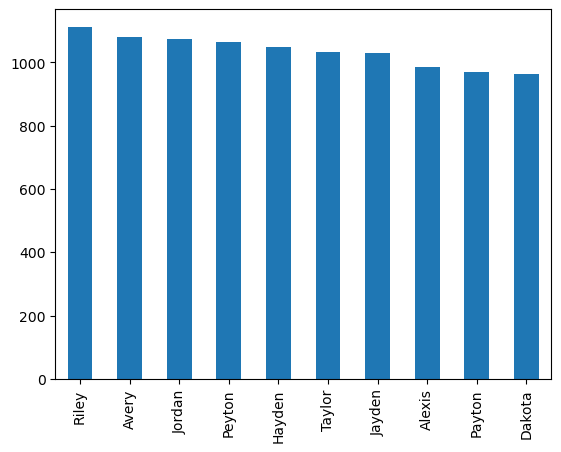

In [11]:
tab.plot(kind = 'bar')


<AxesSubplot:>

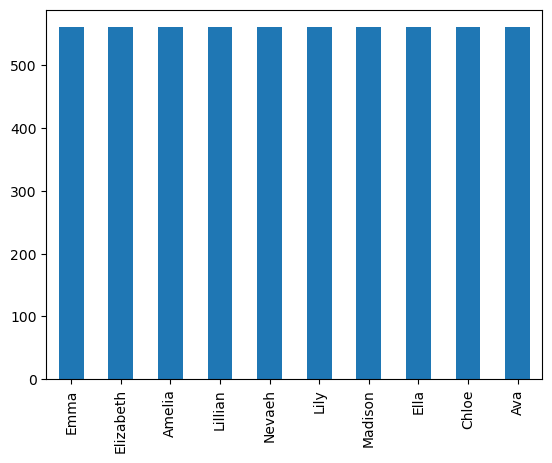

In [12]:
tab_f.plot(kind = 'bar')


<AxesSubplot:>

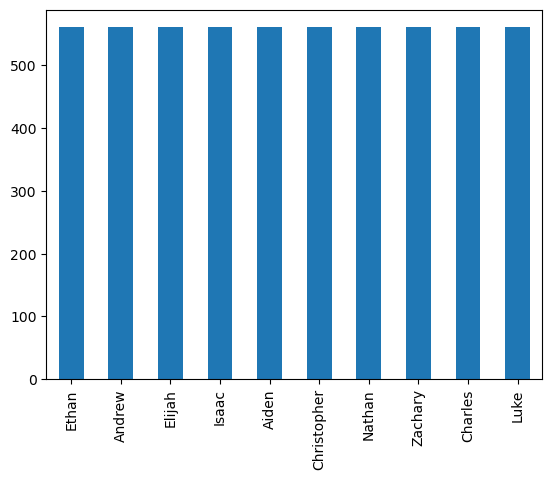

In [13]:
tab_m.plot(kind = 'bar')

In [14]:
# how to get only those elements for whose name is riley

baby_names[baby_names['Name']=='Riley']

,Unnamed: 0,Id,Name,Year,Gender,State,Count
33,11382,11383,Riley,2004,F,AK,17
255,11604,11605,Riley,2005,F,AK,13
530,11879,11880,Riley,2006,F,AK,8
669,12018,12019,Riley,2007,F,AK,17
871,12220,12221,Riley,2008,F,AK,17
...,...,...,...,...,...,...,...
1015597,5646628,5646629,Riley,2010,M,WY,11
1015769,5646800,5646801,Riley,2011,M,WY,12
1015973,5647004,5647005,Riley,2012,M,WY,8
1016154,5647185,5647186,Riley,2013,M,WY,7


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [15]:
print(len(baby_names['Name']))
print(len(baby_names['Name'].drop_duplicates()))

1016395
17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [16]:
import numpy as np

names = list(baby_names['Name'].drop_duplicates())

probabilities = [name_counts[i] / len(baby_names) for i in names]

np.random.choice(names, p= probabilities)

'Gabriella'

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [4]:
baby_names['Name'].value_counts().head(1)

NameError: name 'baby_names' is not defined

## Część II

Krok 1: Wczytaj dane

In [45]:
with open('ocupation.txt','r+') as file:
    content = file.read()
    content = content.replace('|',',')
    file.seek(0) # moves cursor to beginning to overwrite the old text
    file.write(content)
    file.truncate()


In [49]:
data = pd.read_csv('ocupation.txt')

df = pd.DataFrame(data)

Krok 2: Podejrzyj pierwsze 25 rekordów

In [50]:
df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [51]:
df. tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [65]:
print("ilosc obserwacji: ", df.shape[0])
print("ilosc kolumn: ",df.shape[1],'\n')
df. info()

ilosc obserwacji:  943
ilosc kolumn:  5 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


Krok 5: Wypisz nazwy kolumn

In [107]:
print(df.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


Krok 6: Ile różnych zawodów jest w zbiorze?

In [108]:
print("różnych zawodów jest: ", len(df['occupation'].drop_duplicates()))

różnych zawodów jest:  21


Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

educator         95
administrator    79
engineer         67
programmer       66
librarian        51
writer           45
executive        32
scientist        31
artist           28
technician       27
Name: occupation, dtype: int64


<AxesSubplot:>

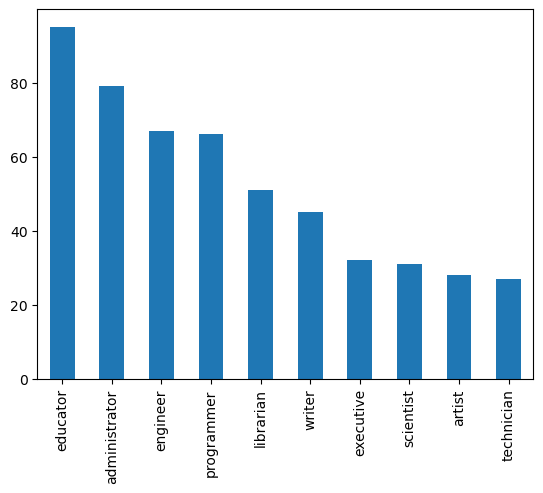

In [143]:

list_of_jobs = df['occupation'][df['occupation']!= "other"][df['occupation']!= "student"]
top_job_counts = list_of_jobs.value_counts()[:10]
print(top_job_counts)
top_job_counts.plot(kind = 'bar')

In [145]:
# chce wyciagnac ładnie ile jest kobiet a ile nezczyzn w kazdym z top_job_counts
import numpy as np
woman_df = df[df['gender']=='F']
f_top_job_counts=np.arange(10)

for i in range(10):
    x = top_job_counts.index[i]
#     print(x)
    y = len(woman_df[woman_df['occupation']==x])
    f_top_job_counts[i]=y

    
man_df = df[df['gender']=='M']
m_top_job_counts=np.arange(10)

for i in range(10):
    x = top_job_counts.index[i]
    y = len(man_df[man_df['occupation']==x])
    m_top_job_counts[i]=y
    
print(f_top_job_counts)    
print(m_top_job_counts)

[26 36  2  6 29 19  3  3 13  1]
[69 43 65 60 22 26 29 28 15 26]


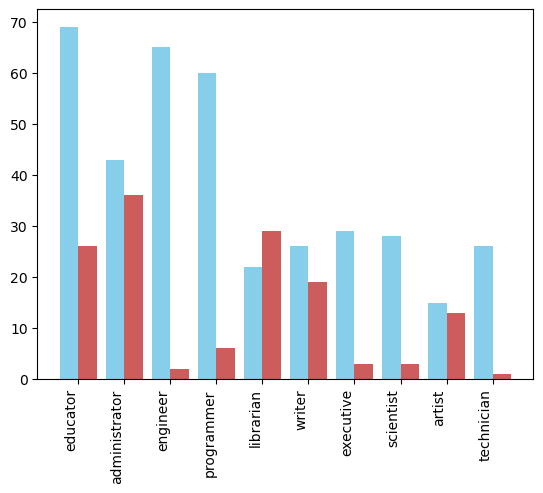

In [163]:
ind = np.arange(len(m_top_job_counts))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, m_top_job_counts, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, f_top_job_counts, width, 
      color='IndianRed', label='Women')


ax.set_xticks(ind)
ax.set_xticklabels(top_job_counts.index,rotation=90, ha='right')
d
plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

<AxesSubplot:xlabel='occupation'>

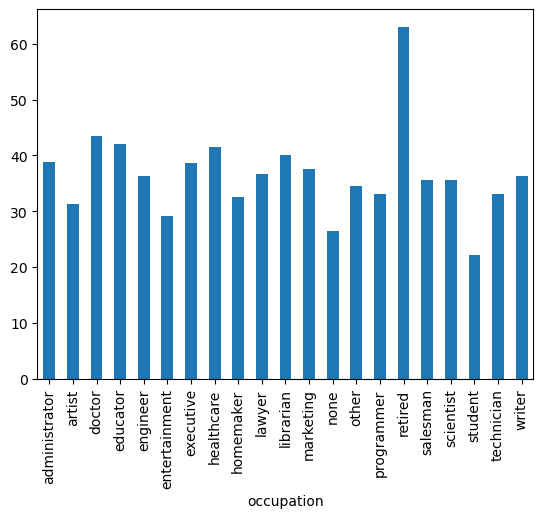

In [183]:
jobs = df['occupation'].drop_duplicates()
jobs
avg_age_by_occupation = df.groupby('occupation')['age'].mean()

avg_age_by_occupation.plot(kind = 'bar')

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

<AxesSubplot:xlabel='occupation'>

<Figure size 1000x600 with 0 Axes>

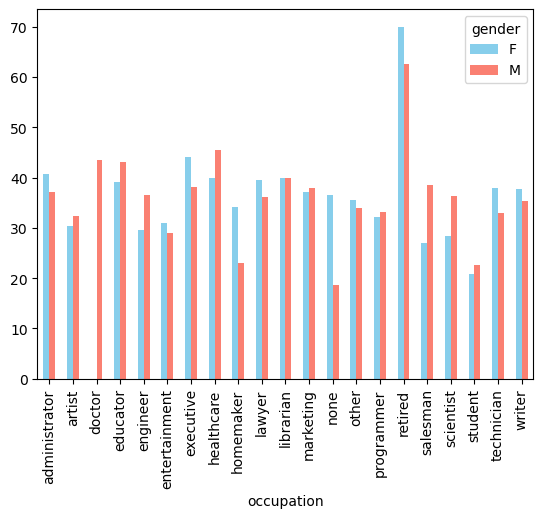

In [184]:
avg_age_by_occupation_gender = df.groupby(['occupation', 'gender'])['age'].mean().unstack()

# Przygotowanie efektywnego wykresu
plt.figure(figsize=(10, 6))
avg_age_by_occupation_gender.plot(kind='bar', color=['skyblue', 'salmon'])
